# Remote Work and Career Satisfaction

## What what will we do in this project?


In this project we will investigate whether people who work remotely are more satisfied with their career than those who don't.

Since a randomized experiment is not available, we will try to answer this question using the matching method.

The matching will help us to reduce the (self)-selection bias. (Self)-selection bias arises in any situation in which individuals select themselves into a group, causing a biased sample. 

Since the two groups (remote workers and non-remote workers) are inherently different from the beginning, we cannot make a simple comparison.

The possibility of bias arises because a difference in the treatment outcome between treated and untreated groups may be caused by a factor that predicts treatment rather than the treatment itself. 

What we're going to do with the matching is create an artificial control group that has similar characteristics to the group receiving the treatment.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
from causalinference import CausalModel
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df = pd.read_csv('stackoverflow.csv')


In [3]:
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


## Understand the unconfoundedness assumption

One of the main assumption of the matching methods is the unfoundedness. This assumption says loosely that all the variables (we call them covariates) affecting both the treatment T and the outcome Y are observed. 

This is why this assumption is often called Selection on Observables.

To continue with our project we assume that **the treated group and the untreated group differ only in one set of observable characteristics.**

### Comparing the groups means

In [5]:
df.groupby('Remote').mean()

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
Remote,,,,,,,,,,,,,,,,,,,
Not remote,70201.175042,7.142857,0.332736,0.760510,2187.325563,7.551106,0.071130,0.130106,0.286312,0.106993,0.121140,0.081092,0.027097,0.031680,0.032477,0.193465,0.035266,0.105997,0.718868
Remote,87400.737001,10.120000,0.443478,0.766957,1712.756522,7.855652,0.062609,0.180870,0.253913,0.107826,0.142609,0.064348,0.026087,0.033043,0.022609,0.220870,0.029565,0.139130,0.751304


As we can see from the crosstable above, the two groups seem to differ not only in whether or not they were treated, but also in almost all other observed characteristics.

We will then run a series of T-tests and Chi-squared tests to ensure that these differences are statistically significant.

### Preparing the data for the statistical tests

In [6]:
df['Remote'] = np.where(df['Remote'] == 'Remote',1,0)

In [7]:
df.head(1)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.0,20,0,1,5000,1,8,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
df.columns


Index(['Country', 'Salary', 'YearsCodedJob', 'OpenSource', 'Hobby',
       'CompanySizeNumber', 'Remote', 'CareerSatisfaction', 'Data_scientist',
       'Database_administrator', 'Desktop_applications_developer',
       'Developer_with_stats_math_background', 'DevOps', 'Embedded_developer',
       'Graphic_designer', 'Graphics_programming',
       'Machine_learning_specialist', 'Mobile_developer',
       'Quality_assurance_engineer', 'Systems_administrator', 'Web_developer'],
      dtype='object')

### T-test for continuous variables

In [9]:
continuous = ['Salary', 'CompanySizeNumber', 'YearsCodedJob']

stats = {}
pvalues = {}

for v in continuous:
    group1 = df[df['Remote'] ==0].dropna()[v]
    group2 = df[df['Remote'] ==1].dropna()[v]
    stats[v], pvalues[v] = ss.ttest_ind(group1, group2)

In [10]:
pvalues = pd.DataFrame.from_dict(pvalues, orient='Index')

In [11]:
pvalues

,0
Salary,1.057708e-22
CompanySizeNumber,4.084448e-03
YearsCodedJob,3.637316e-30


**The p-values ​​resulting from the t-test performed on the continuous variables are very small, this allows us to confirm that there is a difference between the means of the groups and that this difference is statistically significant.**

###  Chi-squared tests for discrete variables

In [12]:
binary = ['OpenSource', 'Hobby',
    'Data_scientist',
       'Database_administrator', 'Desktop_applications_developer',
       'Developer_with_stats_math_background', 'DevOps', 'Embedded_developer',
       'Graphic_designer', 'Graphics_programming',
       'Machine_learning_specialist', 'Mobile_developer',
       'Quality_assurance_engineer', 'Systems_administrator', 'Web_developer']
stat ={}
pvalue ={}
dof={}
expected={}

for v in binary: 
    tab = pd.crosstab(index=df[v], columns= df.CareerSatisfaction)
    stat[v], pvalue[v], dof[v], expected[v] = ss.chi2_contingency(tab)

In [13]:
chisquare = pd.DataFrame.from_dict(pvalue, orient='Index')
chisquare.columns=['pvalue']
chisquare

,pvalue
OpenSource,0.000031
Hobby,0.000124
Data_scientist,0.564595
Database_administrator,0.073759
Desktop_applications_developer,0.639982
Developer_with_stats_math_background,0.077096
DevOps,0.868412
Embedded_developer,0.262020
Graphic_designer,0.700763
Graphics_programming,0.794663


**The chi-squared tests show us that there is a relationship between some characteristics of the subjects studied and career satisfaction. Once again we have a confirmation that the two groups cannot be compared but as we said we will solve this problem using matching.**

## Matching

### Preparring the data for the matching 

In [14]:
df.Country.value_counts()

United States     2791
United Kingdom    1023
Germany            757
India              538
Canada             485
Name: Country, dtype: int64

In [15]:
# getting dummies variable for Country
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.head(1)

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,...,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,Country_Germany,Country_India,Country_United Kingdom,Country_United States
0,100000.0,20,0,1,5000,1,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# isolating the treatment
treat = df['Remote'].values

In [18]:
# isolating the dependent variable
y = df['CareerSatisfaction'].values

In [19]:
# isolating the cofunders
confunders = df.drop(columns=['Remote', 'CareerSatisfaction'], axis=1).values


## Common Support Region

In order to proceed with the matching we must ensure that the subjects belonging to the treated group and the untreated group are similar enough.

To do this we will calculate the propensity score. A propensity score is the probability of a subject being assigned to a particular treatment given a set of observed covariates.

Once we have calculated the propensity score we need to ensure that there is an overlap between the range of propensity scores of the treated group and the untreated group. This overlapping is called **Common Support Region**. We cannot make any inferences about treatment efficacy for those subjects for whom no other subject exists with a similar propensity score.

We estimate the propensity score by running a logistic regresion model where the outcome variable is a binary variable indicating treatment status. 

In [20]:
import statsmodels.api as sm
confunders_csr = sm.add_constant(confunders)
csr_model = sm.Logit(treat, confunders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.306995
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5594
Model:                          Logit   Df Residuals:                     5571
Method:                           MLE   Df Model:                           22
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.07299
Time:                        10:14:00   Log-Likelihood:                -1717.3
converged:                       True   LL-Null:                       -1852.6
Covariance Type:            nonrobust   LLR p-value:                 1.145e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7907      0.259    -14.664      0.000      -4.297      -3.284
x1          4.442e-06   1.77e

In [21]:
probabilitis = csr_model.predict(confunders_csr)

In [22]:
df_prob = np.vstack([treat, probabilitis]).transpose()
df_prob

array([[1.        , 0.09092906],
       [1.        , 0.22701329],
       [0.        , 0.16525409],
       ...,
       [0.        , 0.09817125],
       [0.        , 0.05286696],
       [0.        , 0.0901275 ]])

In [23]:
not_treated = df_prob[df_prob[:,0] == 0][:,1]

In [24]:
treated = df_prob[df_prob[:,0] == 1][:,1]

In [25]:
not_treated

array([0.16525409, 0.03699788, 0.06132909, ..., 0.09817125, 0.05286696,
       0.0901275 ])

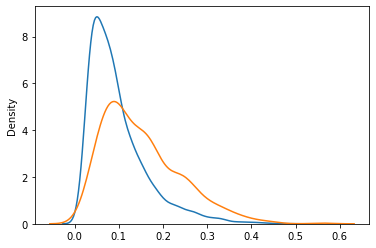

In [26]:
plot_not_treated = sns.kdeplot(not_treated)
plot_treated = sns.kdeplot(treated)

**The graph above shows us that there is enough overlap of the distribution of the propensity scores across treatment and comparison group and it indicates the regions of stratification share enough members of the treatment and control groups.**

## Training the model

In [27]:
model = CausalModel(y, treat, confunders)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.094      0.137      0.683      0.495     -0.175      0.363
           ATC      0.071      0.144      0.491      0.624     -0.212      0.353
           ATT      0.295      0.145      2.045      0.041      0.012      0.579



## How to interpret these results?

To be able to do we can look at the Average Treatment Effect (ATE). The ATE measures the difference in mean outcomes between units assigned to the treatment and units assigned to the control.

In our case the ATE is positive, this means that the subjects who received the treatment, therefore the remote workers, are on average more satisfied with their career. However, we can observe that the p-value is very high, this indicates that this result is not statistically significant.

We can conclude our project by saying that it is not possible to establish whether there is a difference in job satisfaction for individuals who work remotely and those who do not.